<a href="https://colab.research.google.com/github/Koyac/Image100knocks1/blob/restart/Image100knocks3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/yoyoyo-yo/Gasyori100knock

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


threshold >> 127


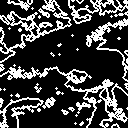

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Grayscale
gray = BGR2GRAY(img)

# Otsu's binarization
otsu = otsu_binarization(gray)

# Erode image
eroded = Erode(otsu)

# Delate image
dilated = Dilate(otsu)

# Morphology
out = np.abs(eroded - dilated) * 255
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

threshold >> 127


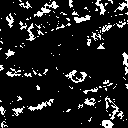

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out

# Opening morphology
def Morphology_Opening(img, time=1):
    dil = Dilate(img, Dil_time=time)
    erode = Erode(dil, Erode_time=time)
    return erode

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Grayscale
gray = BGR2GRAY(img)

# Otsu's binarization
otsu = otsu_binarization(gray)

# Opening process
opened = Morphology_Opening(otsu, time=3)

# Tophat
out = np.abs(otsu - opened) * 255
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow( out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) < 255*4:
					out[y-1, x-1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H+1):
			for x in range(1, W+1):
				if np.sum(MF * tmp[y-1:y+2, x-1:x+2]) >= 255:
					out[y-1, x-1] = 255

	return out

def Morphology_Closing(img,time=1):
  erode = Erode(img,Erode_time=time)
  dil = Dilate(erode,Dil_time=time)
  return erode

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

gray = BGR2GRAY(img)

otsu = otsu_binarization(gray)

opened = Morphology_Closing(otsu,time=3)
out = np.abs(opened - otsu) * 255

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # get template image shape
    Ht, Wt, Ct = template.shape

    # Templete matching
    # prepare x, y index
    i, j = -1, -1
    # prepare evaluate value
    v = 255 * H * W * C

    for y in range(H - Ht):
        for x in range(W - Wt):
            # get SAD value
            _v = np.sum(np.abs(img[y : y + Ht, x : x + Wt] - template))

            # if SAD is min
            if _v < v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)

                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # get template image shape
    Ht, Wt, Ct = template.shape
    i, j = -1, -1
    # prepare evaluate value
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            _v = np.sum(img[y : y + Ht, x : x + Wt] * template)
            # devided numerator
            _v /= (np.sqrt(np.sum(img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            # if NCC is max
            if _v > v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

img = cv2.imread("imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)
                
# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# template matching
def Template_matching(img, template):
    # get original image shape
    H, W, C = img.shape

    # subtract mean BGR
    _img = img - np.mean(img, axis=(0, 1))

    # get template image shape
    Ht, Wt, Ct = template.shape

    # subtract mean BGR
    _template = template - np.mean(img, axis=(0, 1))

    # Templete matching
    # prepare x, y index
    i, j = -1, -1
    # prepare evaluate value
    v = -1

    for y in range(H - Ht):
        for x in range(W - Wt):
            # get ZNCC value
            # get numerator of ZNCC
            _v = np.sum(_img[y : y + Ht, x : x + Wt] * _template)
            # devided numerator
            _v /= (np.sqrt(np.sum(_img[y : y + Ht, x : x + Wt] ** 2)) * np.sqrt(np.sum(template ** 2)))

            # if ZNCC is max
            if _v > v:
                v = _v
                i, j = x, y

    out = img.copy()
    # draw rectangle
    cv2.rectangle(out, pt1=(i, j), pt2=(i+Wt, j+Ht), color=(0,0,255), thickness=1)
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# Read templete image
template = cv2.imread("imori_part.jpg").astype(np.float32)

# Template matching
out = Template_matching(img, template)


# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# labeling 4 nearest neighbor
def labeling_4nn(img):
    # get image shape
    H, W, C = img.shape

    # prepare label tempolary image
    label = np.zeros((H, W), dtype=np.int)
    label[img[..., 0]>0] = 1

    # look up table
    LUT = [0 for _ in range(H*W)]

    n = 1

    for y in range(H):
        for x in range(W):
            # skip black pixel
            if label[y, x] == 0:
                continue
            
            # get above pixel
            c3 = label[max(y-1,0), x]

            # get left pixel
            c5 = label[y, max(x-1,0)]

            # if not labeled
            if c3 < 2 and c5 < 2:
                # labeling
                n += 1
                label[y, x] = n
            else:
                # replace min label index
                _vs = [c3, c5]
                vs = [a for a in _vs if a > 1]
                v = min(vs)
                label[y, x] = v
                
                minv = v
                for _v in vs:
                    if LUT[_v] != 0:
                        minv = min(minv, LUT[_v])
                for _v in vs:
                    LUT[_v] = minv
                    
    count = 1

    # integrate index of look up table
    for l in range(2, n+1):
        flag = True
        for i in range(n+1):
            if LUT[i] == l:
                if flag:
                    count += 1
                    flag = False
                LUT[i] = count

    # draw color
    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, C), dtype=np.uint8)

    for i, lut in enumerate(LUT[2:]):
        out[label == (i+2)] = COLORS[lut-2]

    return out
    

# Read image
img = cv2.imread("seg.png").astype(np.float32)

# labeling 4 nearest neighbor
out = labeling_4nn(img)

# Save result
cv2.imwrite("out.png", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# labeling 8 nearest neighbor
def labeling_8nn(img):
    # get image shape
    H, W, C = img.shape

    # prepare labeling image
    label = np.zeros((H, W), dtype=np.int)
    label[img[..., 0]>0] = 1

    # look up table
    LUT = [0 for _ in range(H*W)]

    n = 1

    for y in range(H):
        for x in range(W):
            if label[y, x] == 0:
                continue
            # get right top pixel
            c2 = label[max(y-1,0), min(x+1, W-1)]
            # get top pixel
            c3 = label[max(y-1,0), x]
            # get left top pixel
            c4 = label[max(y-1,0), max(x-1,0)]
            # get left pixel
            c5 = label[y, max(x-1,0)]

            # if all pixel is non labeled
            if c3 < 2 and c5 < 2 and c2 < 2 and c4 < 2:
                n += 1
                label[y, x] = n
            else:
                # get labeled index
                _vs = [c3, c5, c2, c4]
                vs = [a for a in _vs if a > 1]
                v = min(vs)
                label[y, x] = v

                minv = v
                for _v in vs:
                    if LUT[_v] != 0:
                        minv = min(minv, LUT[_v])
                for _v in vs:
                    LUT[_v] = minv
                    
    count = 1

    # integrate labeled index of look up table
    for l in range(2, n+1):
        flag = True
        for i in range(n+1):
            if LUT[i] == l:
                if flag:
                    count += 1
                    flag = False
                LUT[i] = count

    # draw color
    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, C), dtype=np.uint8)

    for i, lut in enumerate(LUT[2:]):
        out[label == (i+2)] = COLORS[lut-2]

    return out
    

# Read image
img = cv2.imread("seg.png").astype(np.float32)

# labeling 8 nearest neighbor
out = labeling_8nn(img)

# Save result
cv2.imwrite("out.png", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def alpha_blend(img1,img2,alpha):
  out = img*alpha+img2*(1-alpha)
  out = out.astype(np.uint8)
  return out

# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# Read blend target image
img2 = cv2.imread("thorino.jpg").astype(np.float32)

out = alpha_blend(img,img2,0.6)

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destoryAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

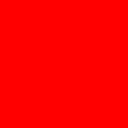

In [ ]:
def connect_4(img):
  H,W,C = img.shape
  tmp = np.zeros((H,W), dtype=np.int)
  tmp[img[...,0]>0] = 1
  out = np.zeros((H,W,3),dtype=np.uint8)
  for y in range(H):
    for x in range(W):
      if tmp[y,x] < 1:
        continue

      S = 0
      S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
      S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
      S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
      S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])

      if S == 0:
        out[y,x] = [0,0,255]
      elif S == 1:
        out[y,x] = [0,255,0]
      elif S == 2:
        out[y,x] = [255,0,0]
      elif S == 3:
        out[y,x] = [255, 255, 0]
      elif S == 4:
        out[y,x] = [255, 0, 255]

  out = out.astype(np.uint8)

  return out

img = cv2.imread('/content/drive/MyDrive/assets/imori.jpg').astype(np.float32)

out = connect_4(img)

cv2.imwrite('out.jpg',out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# connect 8
def connect_8(img):
    # get shape
    H, W, C = img.shape

    # prepare temporary
    _tmp = np.zeros((H, W), dtype=np.int)

    # get binarize
    _tmp[img[..., 0] > 0] = 1

    # inverse for connect 8
    tmp = 1 - _tmp

    # prepare image
    out = np.zeros((H, W, 3), dtype=np.uint8)

    # each pixel
    for y in range(H):
        for x in range(W):
            if _tmp[y, x] < 1:
                continue

            S = 0
            S += (tmp[y,min(x+1,W-1)] - tmp[y,min(x+1,W-1)] * tmp[max(y-1,0),min(x+1,W-1)] * tmp[max(y-1,0),x])
            S += (tmp[max(y-1,0),x] - tmp[max(y-1,0),x] * tmp[max(y-1,0),max(x-1,0)] * tmp[y,max(x-1,0)])
            S += (tmp[y,max(x-1,0)] - tmp[y,max(x-1,0)] * tmp[min(y+1,H-1),max(x-1,0)] * tmp[min(y+1,H-1),x])
            S += (tmp[min(y+1,H-1),x] - tmp[min(y+1,H-1),x] * tmp[min(y+1,H-1),min(x+1,W-1)] * tmp[y,min(x+1,W-1)])
            
            if S == 0:
                out[y,x] = [0, 0, 255]
            elif S == 1:
                out[y,x] = [0, 255, 0]
            elif S == 2:
                out[y,x] = [255, 0, 0]
            elif S == 3:
                out[y,x] = [255, 255, 0]
            elif S == 4:
                out[y,x] = [255, 0, 255]
                    
    out = out.astype(np.uint8)

    return out


# Read image
img = cv2.imread("renketsu.png").astype(np.float32)

# connect 8
out = connect_8(img)


# Save result
cv2.imwrite("out.png", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()


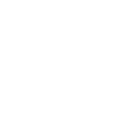

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def thining(img):
  H,W,C = img.shape
  out = np.zeros((H,W),dtype=np.int)
  out[img[...,0]>0] = 1

  count = 1
  while count > 0:
    count = 0
    tmp = out.copy()
    for y in range(H):
      for x in range(W):
        if out[y,x] < 1:
          continue

        judge = 0

        if (tmp[y, min(x+1, W-1)] + tmp[max(y-1, 0), x] + tmp[y, max(x-1, 0)] + tmp[min(y+1, H-1), x]) < 4:
          judge += 1

        c = 0
        c += (tmp[y,min(x+1, W-1)] - tmp[y, min(x+1, W-1)] * tmp[max(y-1, 0),min(x+1, W-1)] * tmp[max(y-1, 0), x])
        c += (tmp[max(y-1,0), x] - tmp[max(y-1,0), x] * tmp[max(y-1, 0), max(x-1, 0)] * tmp[y, max(x-1, 0)])
        c += (tmp[y, max(x-1, 0)] - tmp[y,max(x-1, 0)] * tmp[min(y+1, H-1), max(x-1, 0)] * tmp[min(y+1, H-1), x])
        c += (tmp[min(y+1, H-1), x] - tmp[min(y+1, H-1), x] * tmp[min(y+1, H-1), min(x+1, W-1)] * tmp[y, min(x+1, W-1)])
        if x == 1:
          judge += 1
        
        if np.sum(tmp[max(y-1,0) : min(y+2,H),max(x-1,0): min(x+2,W)]) >= 4:
          judge += 1

        if judge == 3:
          out[y,x] = 0
          count += 1

  out = out.astype(np.uint8) * 255
  return out

img = cv2.imread('/content/drive/MyDrive/assets/imori.jpg').astype(np.float32)

out = thining(img)

# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

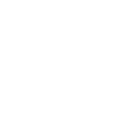

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def Zhang_Suen_thining(img):
    # get shape
    H, W, C = img.shape

    # prepare out image
    out = np.zeros((H, W), dtype=np.int)
    out[img[..., 0] > 0] = 1

    # inverse
    out = 1 - out

    while True:
        s1 = []
        s2 = []

        # step 1 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y+1, x] < 1:
                    continue

                # condition 5
                if out[y, x+1] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s1.append([y, x])

        for v in s1:
            out[v[0], v[1]] = 1

        # step 2 ( rasta scan )
        for y in range(1, H-1):
            for x in range(1, W-1):
                
                # condition 1
                if out[y, x] > 0:
                    continue

                # condition 2
                f1 = 0
                if (out[y-1, x+1] - out[y-1, x]) == 1:
                    f1 += 1
                if (out[y, x+1] - out[y-1, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x+1] - out[y, x+1]) == 1:
                    f1 += 1
                if (out[y+1, x] - out[y+1,x+1]) == 1:
                    f1 += 1
                if (out[y+1, x-1] - out[y+1, x]) == 1:
                    f1 += 1
                if (out[y, x-1] - out[y+1, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x-1] - out[y, x-1]) == 1:
                    f1 += 1
                if (out[y-1, x] - out[y-1, x-1]) == 1:
                    f1 += 1

                if f1 != 1:
                    continue
                    
                # condition 3
                f2 = np.sum(out[y-1:y+2, x-1:x+2])
                if f2 < 2 or f2 > 6:
                    continue
                
                # condition 4
                if out[y-1, x] + out[y, x+1] + out[y, x-1] < 1:
                    continue

                # condition 5
                if out[y-1, x] + out[y+1, x] + out[y, x-1] < 1:
                    continue
                    
                s2.append([y, x])

        for v in s2:
            out[v[0], v[1]] = 1

        # if not any pixel is changed
        if len(s1) < 1 and len(s2) < 1:
            break

    out = 1 - out
    out = out.astype(np.uint8) * 255

    return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# Zhang Suen thining
out = Zhang_Suen_thining(img)


# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


# get HOG step1
def HOG_step1(img):
     # Grayscale
     def BGR2GRAY(img):
          gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
          return gray

     # Magnitude and gradient
     def get_gradXY(gray):
          H, W = gray.shape

          # padding before grad
          gray = np.pad(gray, (1, 1), 'edge')

          # get grad x
          gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
          # get grad y
          gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
          # replace 0 with 
          gx[gx == 0] = 1e-6

          return gx, gy

     # get magnitude and gradient
     def get_MagGrad(gx, gy):
          # get gradient maginitude
          magnitude = np.sqrt(gx ** 2 + gy ** 2)

          # get gradient angle
          gradient = np.arctan(gy / gx)

          gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

          return magnitude, gradient

     # Gradient histogram
     def quantization(gradient):
          # prepare quantization table
          gradient_quantized = np.zeros_like(gradient, dtype=np.int)

          # quantization base
          d = np.pi / 9

          # quantization
          for i in range(9):
               gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

          return gradient_quantized

     # 1. BGR -> Gray
     gray = BGR2GRAY(img)

     # 1. Gray -> Gradient x and y
     gx, gy = get_gradXY(gray)

     # 2. get gradient magnitude and angle
     magnitude, gradient = get_MagGrad(gx, gy)

     # 3. Quantization
     gradient_quantized = quantization(gradient)

     return magnitude, gradient_quantized


# Read image
img = cv2.imread("imori.jpg").astype(np.float32)

# get HOG step1
magnitude, gradient_quantized = HOG_step1(img)

# Write gradient magnitude to file
_magnitude = (magnitude / magnitude.max() * 255).astype(np.uint8)

cv2.imwrite("out_mag.jpg", _magnitude)

# Write gradient angle to file
H, W, C = img.shape
out = np.zeros((H, W, 3), dtype=np.uint8)

# define color
C = [[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [255, 0, 255], [0, 255, 255],
     [127, 127, 0], [127, 0, 127], [0, 127, 127]]

# draw color
for i in range(9):
     out[gradient_quantized == i] = C[i]


cv2.imwrite("out_gra.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)
cv2.destroyAllWindows()

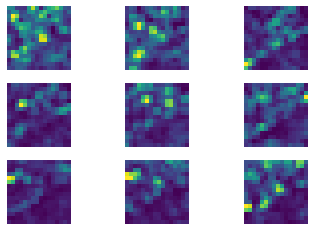

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG step2
def HOG_step2(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized

        
    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)

    return histogram


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# get HOG step2
histogram = HOG_step2(img)
                
# write histogram to file
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[..., i])
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.savefig("out.png")
plt.show()

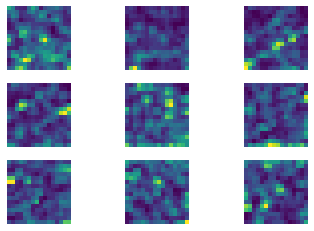

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG
def HOG(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized


    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

		# histogram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape
        ## each histogram
        for y in range(cell_N_H):
    	    for x in range(cell_N_W):
       	    #for i in range(9):
                histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                            max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)
    
    # 5. Histogram normalization
    histogram = normalization(histogram)

    return histogram


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# get HOG
histogram = HOG(img)
                
# Write result to file
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(histogram[..., i])
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")
plt.savefig("out.png")
plt.show()

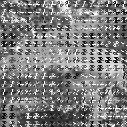

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# get HOG
def HOG(img):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    # Magnitude and gradient
    def get_gradXY(gray):
        H, W = gray.shape

        # padding before grad
        gray = np.pad(gray, (1, 1), 'edge')

        # get grad x
        gx = gray[1:H+1, 2:] - gray[1:H+1, :W]
        # get grad y
        gy = gray[2:, 1:W+1] - gray[:H, 1:W+1]
        # replace 0 with 
        gx[gx == 0] = 1e-6

        return gx, gy

    # get magnitude and gradient
    def get_MagGrad(gx, gy):
        # get gradient maginitude
        magnitude = np.sqrt(gx ** 2 + gy ** 2)

        # get gradient angle
        gradient = np.arctan(gy / gx)

        gradient[gradient < 0] = np.pi / 2 + gradient[gradient < 0] + np.pi / 2

        return magnitude, gradient

    # Gradient histogram
    def quantization(gradient):
        # prepare quantization table
        gradient_quantized = np.zeros_like(gradient, dtype=np.int)

        # quantization base
        d = np.pi / 9

        # quantization
        for i in range(9):
            gradient_quantized[np.where((gradient >= d * i) & (gradient <= d * (i + 1)))] = i

        return gradient_quantized


    # get gradient histogram
    def gradient_histogram(gradient_quantized, magnitude, N=8):
        # get shape
        H, W = magnitude.shape

        # get cell num
        cell_N_H = H // N
        cell_N_W = W // N
        histogram = np.zeros((cell_N_H, cell_N_W, 9), dtype=np.float32)

        # each pixel
        for y in range(cell_N_H):
            for x in range(cell_N_W):
                for j in range(N):
                    for i in range(N):
                        histogram[y, x, gradient_quantized[y * 4 + j, x * 4 + i]] += magnitude[y * 4 + j, x * 4 + i]

        return histogram

		# histogram normalization
    def normalization(histogram, C=3, epsilon=1):
        cell_N_H, cell_N_W, _ = histogram.shape
        ## each histogram
        for y in range(cell_N_H):
    	    for x in range(cell_N_W):
       	    #for i in range(9):
                histogram[y, x] /= np.sqrt(np.sum(histogram[max(y - 1, 0) : min(y + 2, cell_N_H),
                                                            max(x - 1, 0) : min(x + 2, cell_N_W)] ** 2) + epsilon)

        return histogram

    # 1. BGR -> Gray
    gray = BGR2GRAY(img)

    # 1. Gray -> Gradient x and y
    gx, gy = get_gradXY(gray)

    # 2. get gradient magnitude and angle
    magnitude, gradient = get_MagGrad(gx, gy)

    # 3. Quantization
    gradient_quantized = quantization(gradient)

    # 4. Gradient histogram
    histogram = gradient_histogram(gradient_quantized, magnitude)
    
    # 5. Histogram normalization
    histogram = normalization(histogram)

    return histogram


# draw HOG
def draw_HOG(img, histogram):
    # Grayscale
    def BGR2GRAY(img):
        gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
        return gray

    def draw(gray, histogram, N=8):
        # get shape
        H, W = gray.shape
        cell_N_H, cell_N_W, _ = histogram.shape
        
        ## Draw
        out = gray[1 : H + 1, 1 : W + 1].copy().astype(np.uint8)

        for y in range(cell_N_H):
            for x in range(cell_N_W):
                cx = x * N + N // 2
                cy = y * N + N // 2
                x1 = cx + N // 2 - 1
                y1 = cy
                x2 = cx - N // 2 + 1
                y2 = cy
                
                h = histogram[y, x] / np.sum(histogram[y, x])
                h /= h.max()
        
                for c in range(9):
                    #angle = (20 * c + 10 - 90) / 180. * np.pi
                    # get angle
                    angle = (20 * c + 10) / 180. * np.pi
                    rx = int(np.sin(angle) * (x1 - cx) + np.cos(angle) * (y1 - cy) + cx)
                    ry = int(np.cos(angle) * (x1 - cx) - np.cos(angle) * (y1 - cy) + cy)
                    lx = int(np.sin(angle) * (x2 - cx) + np.cos(angle) * (y2 - cy) + cx)
                    ly = int(np.cos(angle) * (x2 - cx) - np.cos(angle) * (y2 - cy) + cy)

                    # color is HOG value
                    c = int(255. * h[c])

                    # draw line
                    cv2.line(out, (lx, ly), (rx, ry), (c, c, c), thickness=1)

        return out
    

    # get gray
    gray = BGR2GRAY(img)

    # draw HOG
    out = draw(gray, histogram)

    return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# get HOG
histogram = HOG(img)

# draw HOG
out = draw_HOG(img, histogram)


# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

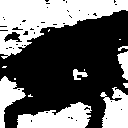

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def BGR2HSV(_img):
	img = _img.copy() / 255.

	hsv = np.zeros_like(img, dtype=np.float32)

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()
	min_arg = np.argmin(img, axis=2)

	# H
	hsv[..., 0][np.where(max_v == min_v)]= 0
	## if min == B
	ind = np.where(min_arg == 0)
	hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
	## if min == R
	ind = np.where(min_arg == 2)
	hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
	## if min == G
	ind = np.where(min_arg == 1)
	hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
		
	# S
	hsv[..., 1] = max_v.copy() - min_v.copy()

	# V
	hsv[..., 2] = max_v.copy()
	
	return hsv

# make mask
def get_mask(hsv):
	mask = np.zeros_like(hsv[..., 0])
	#mask[np.where((hsv > 180) & (hsv[0] < 260))] = 255
	mask[np.logical_and((hsv[..., 0] > 180), (hsv[..., 0] < 260))] = 255
	return mask


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# RGB > HSV
hsv = BGR2HSV(img)


# color tracking
mask = get_mask(hsv)

out = mask.astype(np.uint8)

# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

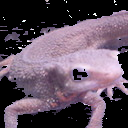

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# BGR -> HSV
def BGR2HSV(_img):
	img = _img.copy() / 255.

	hsv = np.zeros_like(img, dtype=np.float32)

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()
	min_arg = np.argmin(img, axis=2)

	# H
	hsv[..., 0][np.where(max_v == min_v)]= 0
	## if min == B
	ind = np.where(min_arg == 0)
	hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
	## if min == R
	ind = np.where(min_arg == 2)
	hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
	## if min == G
	ind = np.where(min_arg == 1)
	hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
		
	# S
	hsv[..., 1] = max_v.copy() - min_v.copy()

	# V
	hsv[..., 2] = max_v.copy()
	
	return hsv

def get_mask(hsv):
  mask = np.zeros_like(hsv[...,0])
  mask[np.logical_and((hsv[...,0]>180),(hsv[...,0]<260))] = 1
  return mask

def masking(img,mask):
  mask = 1 - mask
  out = img.copy()
  mask = np.tile(mask,[3,1,1]).transpose([1,2,0])
  out *= mask
  return out

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

hsv = BGR2HSV(img / 255.)

# color tracking
mask = get_mask(hsv)

# masking
out = masking(img, mask)

out = out.astype(np.uint8)

# Save result
cv2.imwrite("out.png", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

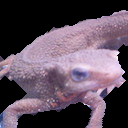

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# BGR -> HSV
def BGR2HSV(_img):
	img = _img.copy() / 255.

	hsv = np.zeros_like(img, dtype=np.float32)

	# get max and min
	max_v = np.max(img, axis=2).copy()
	min_v = np.min(img, axis=2).copy()
	min_arg = np.argmin(img, axis=2)

	# H
	hsv[..., 0][np.where(max_v == min_v)]= 0
	## if min == B
	ind = np.where(min_arg == 0)
	hsv[..., 0][ind] = 60 * (img[..., 1][ind] - img[..., 2][ind]) / (max_v[ind] - min_v[ind]) + 60
	## if min == R
	ind = np.where(min_arg == 2)
	hsv[..., 0][ind] = 60 * (img[..., 0][ind] - img[..., 1][ind]) / (max_v[ind] - min_v[ind]) + 180
	## if min == G
	ind = np.where(min_arg == 1)
	hsv[..., 0][ind] = 60 * (img[..., 2][ind] - img[..., 0][ind]) / (max_v[ind] - min_v[ind]) + 300
		
	# S
	hsv[..., 1] = max_v.copy() - min_v.copy()

	# V
	hsv[..., 2] = max_v.copy()
	
	return hsv

# make mask
def get_mask(hsv):
	mask = np.zeros_like(hsv[..., 0])
	#mask[np.where((hsv > 180) & (hsv[0] < 260))] = 255
	mask[np.logical_and((hsv[..., 0] > 180), (hsv[..., 0] < 260))] = 1
	return mask

# masking
def masking(img, mask):
	mask = 1 - mask
	out = img.copy()
	# mask [h, w] -> [h, w, channel]
	mask = np.tile(mask, [3, 1, 1]).transpose([1, 2, 0])
	out *= mask

	return out


# Erosion
def Erode(img, Erode_time=1):
	H, W = img.shape
	out = img.copy()

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each erode
	for i in range(Erode_time):
		tmp = np.pad(out, (1, 1), 'edge')
		# erode
		for y in range(1, H + 1):
			for x in range(1, W + 1):
				if np.sum(MF * tmp[y - 1 : y + 2 , x - 1 : x + 2]) < 1 * 4:
					out[y - 1, x - 1] = 0

	return out


# Dilation
def Dilate(img, Dil_time=1):
	H, W = img.shape

	# kernel
	MF = np.array(((0, 1, 0),
				(1, 0, 1),
				(0, 1, 0)), dtype=np.int)

	# each dilate time
	out = img.copy()
	for i in range(Dil_time):
		tmp = np.pad(out, (1, 1), 'edge')
		for y in range(1, H + 1):
			for x in range(1, W + 1):
				if np.sum(MF * tmp[y - 1 : y + 2, x - 1 : x + 2]) >= 1:
					out[y - 1, x - 1] = 1

	return out


# Opening morphology
def Morphology_Opening(img, time=1):
    out = Erode(img, Erode_time=time)
    out = Dilate(out, Dil_time=time)
    return out

# Closing morphology
def Morphology_Closing(img, time=1):
	out = Dilate(img, Dil_time=time)
	out = Erode(out, Erode_time=time)
	return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# RGB > HSV
hsv = BGR2HSV(img / 255.)

# color tracking
mask = get_mask(hsv)

# closing
mask = Morphology_Closing(mask, time=5)

# opening
mask = Morphology_Opening(mask, time=5)

# masking
out = masking(img, mask)

out = out.astype(np.uint8)

# Save result
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)
cv2.destroyAllWindows()

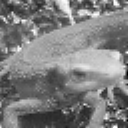

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Bi-Linear interpolation
def bl_interpolate(img, ax=1., ay=1.):
	if len(img.shape) > 2:
		H, W, C = img.shape
	else:
		H, W = img.shape
		C = 1

	aH = int(ay * H)
	aW = int(ax * W)

	# get position of resized image
	y = np.arange(aH).repeat(aW).reshape(aW, -1)
	x = np.tile(np.arange(aW), (aH, 1))

	# get position of original position
	y = (y / ay)
	x = (x / ax)

	ix = np.floor(x).astype(np.int)
	iy = np.floor(y).astype(np.int)

	ix = np.minimum(ix, W-2)
	iy = np.minimum(iy, H-2)

	# get distance 
	dx = x - ix
	dy = y - iy

	if C > 1:
		dx = np.repeat(np.expand_dims(dx, axis=-1), C, axis=-1)
		dy = np.repeat(np.expand_dims(dy, axis=-1), C, axis=-1)

	# interpolation
	out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out


img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)
gray = BGR2GRAY(img)
# Bilinear interpolation
out = bl_interpolate(gray.astype(np.float32), ax=0.5, ay=0.5)

# Bilinear interpolation
out = bl_interpolate(out, ax=2., ay=2.)

out = out.astype(np.uint8)

# Save result
cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

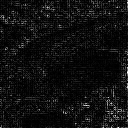

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Bi-Linear interpolation
def bl_interpolate(img, ax=1., ay=1.):
	if len(img.shape) > 2:
		H, W, C = img.shape
	else:
		H, W = img.shape
		C = 1

	aH = int(ay * H)
	aW = int(ax * W)

	# get position of resized image
	y = np.arange(aH).repeat(aW).reshape(aW, -1)
	x = np.tile(np.arange(aW), (aH, 1))

	# get position of original position
	y = (y / ay)
	x = (x / ax)

	ix = np.floor(x).astype(np.int)
	iy = np.floor(y).astype(np.int)

	ix = np.minimum(ix, W-2)
	iy = np.minimum(iy, H-2)

	# get distance 
	dx = x - ix
	dy = y - iy

	if C > 1:
		dx = np.repeat(np.expand_dims(dx, axis=-1), C, axis=-1)
		dy = np.repeat(np.expand_dims(dy, axis=-1), C, axis=-1)

	# interpolation
	out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

gray = BGR2GRAY(img)

# Bilinear interpolation
out = bl_interpolate(gray.astype(np.float32), ax=0.5, ay=0.5)

# Bilinear interpolation
out = bl_interpolate(out, ax=2., ay=2.)

out = np.abs(out - gray)

out = out / out.max() * 255

out = out.astype(np.uint8)

# Save result
cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)


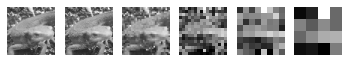

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Bi-Linear interpolation
def bl_interpolate(img, ax=1., ay=1.):
	if len(img.shape) > 2:
		H, W, C = img.shape
	else:
		H, W = img.shape
		C = 1

	aH = int(ay * H)
	aW = int(ax * W)

	# get position of resized image
	y = np.arange(aH).repeat(aW).reshape(aW, -1)
	x = np.tile(np.arange(aW), (aH, 1))

	# get position of original position
	y = (y / ay)
	x = (x / ax)

	ix = np.floor(x).astype(np.int)
	iy = np.floor(y).astype(np.int)

	ix = np.minimum(ix, W-2)
	iy = np.minimum(iy, H-2)

	# get distance 
	dx = x - ix
	dy = y - iy

	if C > 1:
		dx = np.repeat(np.expand_dims(dx, axis=-1), C, axis=-1)
		dy = np.repeat(np.expand_dims(dy, axis=-1), C, axis=-1)

	# interpolation
	out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out

# make image pyramid
def make_pyramid(gray):
	# first element
	pyramid = [gray]
	# each scale
	for i in range(1, 6):
		# define scale
		a = 2. ** i

		# down scale
		p = bl_interpolate(gray, ax=1./a, ay=1. / a)

		# add pyramid list
		pyramid.append(p)
		
	return pyramid

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

gray = BGR2GRAY(img)

# pyramid
pyramid = make_pyramid(gray)

for i in range(6):
    cv2.imwrite("out_{}.jpg".format(2**i), pyramid[i].astype(np.uint8))
    plt.subplot(1, 6, i+1)
    plt.imshow(pyramid[i], cmap='gray')
    plt.axis('off')
    plt.xticks(color="None")
    plt.yticks(color="None")

plt.show()

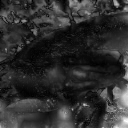

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Bi-Linear interpolation
def bl_interpolate(img, ax=1., ay=1.):
	if len(img.shape) > 2:
		H, W, C = img.shape
	else:
		H, W = img.shape
		C = 1

	aH = int(ay * H)
	aW = int(ax * W)

	# get position of resized image
	y = np.arange(aH).repeat(aW).reshape(aW, -1)
	x = np.tile(np.arange(aW), (aH, 1))

	# get position of original position
	y = (y / ay)
	x = (x / ax)

	ix = np.floor(x).astype(np.int)
	iy = np.floor(y).astype(np.int)

	ix = np.minimum(ix, W-2)
	iy = np.minimum(iy, H-2)

	# get distance 
	dx = x - ix
	dy = y - iy

	if C > 1:
		dx = np.repeat(np.expand_dims(dx, axis=-1), C, axis=-1)
		dy = np.repeat(np.expand_dims(dy, axis=-1), C, axis=-1)

	# interpolation
	out = (1-dx) * (1-dy) * img[iy, ix] + dx * (1 - dy) * img[iy, ix+1] + (1 - dx) * dy * img[iy+1, ix] + dx * dy * img[iy+1, ix+1]

	out = np.clip(out, 0, 255)
	out = out.astype(np.uint8)

	return out

# make image pyramid
def make_pyramid(gray):
	# first element
	pyramid = [gray]
	# each scale
	for i in range(1, 6):
		# define scale
		a = 2. ** i

		# down scale
		p = bl_interpolate(gray, ax=1./a, ay=1. / a)

		# up scale
		p = bl_interpolate(p, ax=a, ay=a)

		# add pyramid list
		pyramid.append(p.astype(np.float32))

	return pyramid

# make saliency map
def saliency_map(pyramid):
	# get shape
	H, W = pyramid[0].shape

	# prepare out image
	out = np.zeros((H, W), dtype=np.float32)

	# add each difference
	out += np.abs(pyramid[0] - pyramid[1])
	out += np.abs(pyramid[0] - pyramid[3])
	out += np.abs(pyramid[0] - pyramid[5])
	out += np.abs(pyramid[1] - pyramid[4])
	out += np.abs(pyramid[2] - pyramid[3])
	out += np.abs(pyramid[3] - pyramid[5])

	# normalization
	out = out / out.max() * 255

	return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# grayscale
gray = BGR2GRAY(img)

# pyramid
pyramid = make_pyramid(gray)
    
# pyramid -> saliency
out = saliency_map(pyramid)

out = out.astype(np.uint8)

# Save result
cv2_imshow(out)
cv2.waitKey(0)
cv2.imwrite("out.jpg", out)

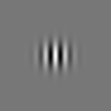

-1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Gabor
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	# get half size
	d = K_size // 2

	# prepare kernel
	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	# each value
	for y in range(K_size):
		for x in range(K_size):
			# distance from center
			px = x - d
			py = y - d

			# degree -> radian
			theta = angle / 180. * np.pi

			# get kernel x
			_x = np.cos(theta) * px + np.sin(theta) * py

			# get kernel y
			_y = -np.sin(theta) * px + np.cos(theta) * py

			# fill kernel
			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	# kernel normalization
	gabor /= np.sum(np.abs(gabor))

	return gabor


# get gabor kernel
gabor = Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0)

# Visualize
# normalize to [0, 255]
out = gabor - np.min(gabor)
out /= np.max(out)
out *= 255

out = out.astype(np.uint8)
cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)

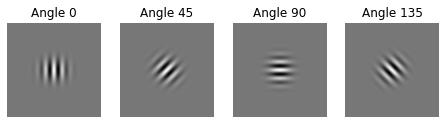

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Gabor
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	# get half size
	d = K_size // 2

	# prepare kernel
	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	# each value
	for y in range(K_size):
		for x in range(K_size):
			# distance from center
			px = x - d
			py = y - d

			# degree -> radian
			theta = angle / 180. * np.pi

			# get kernel x
			_x = np.cos(theta) * px + np.sin(theta) * py

			# get kernel y
			_y = -np.sin(theta) * px + np.cos(theta) * py

			# fill kernel
			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	# kernel normalization
	gabor /= np.sum(np.abs(gabor))

	return gabor


# define each angle
As = [0, 45, 90, 135]

# prepare pyplot
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

# each angle
for i, A in enumerate(As):
    # get gabor kernel
    gabor = Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=A)

    # normalize to [0, 255]
    out = gabor - np.min(gabor)
    out /= np.max(out)
    out *= 255
    
    out = out.astype(np.uint8)
    plt.subplot(1, 4, i+1)
    plt.imshow(out, cmap='gray')
    plt.axis('off')
    plt.title("Angle "+str(A))

plt.savefig("out.png")
plt.show()

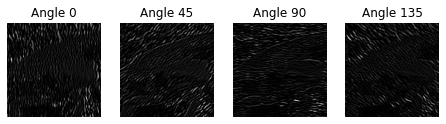

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Gabor
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	# get half size
	d = K_size // 2

	# prepare kernel
	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	# each value
	for y in range(K_size):
		for x in range(K_size):
			# distance from center
			px = x - d
			py = y - d

			# degree -> radian
			theta = angle / 180. * np.pi

			# get kernel x
			_x = np.cos(theta) * px + np.sin(theta) * py

			# get kernel y
			_y = -np.sin(theta) * px + np.cos(theta) * py

			# fill kernel
			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	# kernel normalization
	gabor /= np.sum(np.abs(gabor))

	return gabor


def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
        
    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


def Gabor_process(img):
    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    As = [0, 45, 90, 135]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        out = Gabor_filtering(gray, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)

        plt.subplot(1, 4, i+1)
        plt.imshow(out, cmap='gray')
        plt.axis('off')
        plt.title("Angle "+str(A))

    plt.savefig("out.png")
    plt.show()

# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# gabor process
Gabor_process(img)


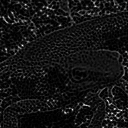

-1

<Figure size 432x288 with 0 Axes>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Grayscale
def BGR2GRAY(img):
	# Grayscale
	gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
	return gray

# Gabor
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
	# get half size
	d = K_size // 2

	# prepare kernel
	gabor = np.zeros((K_size, K_size), dtype=np.float32)

	# each value
	for y in range(K_size):
		for x in range(K_size):
			# distance from center
			px = x - d
			py = y - d

			# degree -> radian
			theta = angle / 180. * np.pi

			# get kernel x
			_x = np.cos(theta) * px + np.sin(theta) * py

			# get kernel y
			_y = -np.sin(theta) * px + np.cos(theta) * py

			# fill kernel
			gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

	# kernel normalization
	gabor /= np.sum(np.abs(gabor))

	return gabor


def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
        
    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


def Gabor_process(img):
    # get shape
    H, W, _ = img.shape

    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    As = [0, 45, 90, 135]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        _out = Gabor_filtering(gray, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)

        # add gabor filtered image
        out += _out

    # scale normalization
    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out


# Read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# gabor process
out = Gabor_process(img)


cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Hessian corner detection
def Hessian_corner(img):

	## Grayscale
	def BGR2GRAY(img):
		gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
		gray = gray.astype(np.uint8)
		return gray

	## Sobel
	def Sobel_filtering(gray):
		# get shape
		H, W = gray.shape

		# sobel kernel
		sobely = np.array(((1, 2, 1),
						(0, 0, 0),
						(-1, -2, -1)), dtype=np.float32)

		sobelx = np.array(((1, 0, -1),
						(2, 0, -2),
						(1, 0, -1)), dtype=np.float32)

		# padding
		tmp = np.pad(gray, (1, 1), 'edge')

		# prepare
		Ix = np.zeros_like(gray, dtype=np.float32)
		Iy = np.zeros_like(gray, dtype=np.float32)

		# get differential
		for y in range(H):
			for x in range(W):
				Ix[y, x] = np.mean(tmp[y : y  + 3, x : x + 3] * sobelx)
				Iy[y, x] = np.mean(tmp[y : y + 3, x : x + 3] * sobely)
			
		Ix2 = Ix ** 2
		Iy2 = Iy ** 2
		Ixy = Ix * Iy

		return Ix2, Iy2, Ixy

		

	## Hessian
	def corner_detect(gray, Ix2, Iy2, Ixy):
		# get shape
		H, W = gray.shape

		# prepare for show detection
		out = np.array((gray, gray, gray))
		out = np.transpose(out, (1,2,0))

		# get Hessian value
		Hes = np.zeros((H, W))

		for y in range(H):
			for x in range(W):
				Hes[y,x] = Ix2[y,x] * Iy2[y,x] - Ixy[y,x] ** 2

		## Detect Corner and show
		for y in range(H):
			for x in range(W):
				if Hes[y,x] == np.max(Hes[max(y-1, 0) : min(y+2, H), max(x-1, 0) : min(x+2, W)]) and Hes[y, x] > np.max(Hes) * 0.1:
					out[y, x] = [0, 0, 255]

		out = out.astype(np.uint8)

		return out

	
	# 1. grayscale
	gray = BGR2GRAY(img)

	# 2. get difference image
	Ix2, Iy2, Ixy = Sobel_filtering(gray)

	# 3. corner detection
	out = corner_detect(gray, Ix2, Iy2, Ixy)

	return out


# Read image
img = cv2.imread("thorino.jpg").astype(np.float32)

# Hessian corner detection
out = Hessian_corner(img)

cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
K_size=3
I_t = np.pad(img, (K_size // 2, K_size // 2), 'edge')
I_t.shape

(130, 130, 5)

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


# Harris corner detection
def Harris_corner_step1(img):

	## Grayscale
	def BGR2GRAY(img):
		gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
		gray = gray.astype(np.uint8)
		return gray

	## Sobel
	def Sobel_filtering(gray):
		# get shape
		H, W = gray.shape

		# sobel kernel
		sobely = np.array(((1, 2, 1),
						(0, 0, 0),
						(-1, -2, -1)), dtype=np.float32)

		sobelx = np.array(((1, 0, -1),
						(2, 0, -2),
						(1, 0, -1)), dtype=np.float32)

		# padding
		tmp = np.pad(gray, (1, 1), 'edge')

		# prepare
		Ix = np.zeros_like(gray, dtype=np.float32)
		Iy = np.zeros_like(gray, dtype=np.float32)

		# get differential
		for y in range(H):
			for x in range(W):
				Ix[y, x] = np.mean(tmp[y : y  + 3, x : x + 3] * sobelx)
				Iy[y, x] = np.mean(tmp[y : y + 3, x : x + 3] * sobely)
			
		Ix2 = Ix ** 2
		Iy2 = Iy ** 2
		Ixy = Ix * Iy

		return Ix2, Iy2, Ixy


	# gaussian filtering
	def gaussian_filtering(I, K_size=3, sigma=3):
		# get shape
		H, W = I.shape

		## gaussian
		I_t = np.pad(I, (K_size // 2, K_size // 2), 'edge')

		# gaussian kernel
		K = np.zeros((K_size, K_size), dtype=np.float)
		for x in range(K_size):
			for y in range(K_size):
				_x = x - K_size // 2
				_y = y - K_size // 2
				K[y, x] = np.exp( -(_x ** 2 + _y ** 2) / (2 * (sigma ** 2)))
		K /= (sigma * np.sqrt(2 * np.pi))
		K /= K.sum()

		# filtering
		for y in range(H):
			for x in range(W):
				I[y,x] = np.sum(I_t[y : y + K_size, x : x + K_size] * K)
				
		return I

	
	# 1. grayscale
	gray = BGR2GRAY(img)

	# 2. get difference image
	Ix2, Iy2, Ixy = Sobel_filtering(gray)

	# 3. gaussian filtering
	Ix2 = gaussian_filtering(Ix2, K_size=3, sigma=3)
	Iy2 = gaussian_filtering(Iy2, K_size=3, sigma=3)
	Ixy = gaussian_filtering(Ixy, K_size=3, sigma=3)

	# show result
	plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

	plt.subplot(1,3,1)
	plt.imshow(Ix2, cmap='gray')
	plt.title("Ix^2")
	plt.axis("off")

	plt.subplot(1,3,2)
	plt.imshow(Iy2, cmap='gray')
	plt.title("Iy^2")
	plt.axis("off")

	plt.subplot(1,3,3)
	plt.imshow(Ixy, cmap='gray')
	plt.title("Ixy")
	plt.axis("off")

	plt.savefig("out.png")
	plt.show()


# Read image
img = cv2.imread("thorino.jpg").astype(np.float32)

# Harris corner detection step1
out = Harris_corner_step1(img)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Harris corner detection
def Harris_corner(img):

	## Grayscale
	def BGR2GRAY(img):
		gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
		gray = gray.astype(np.uint8)
		return gray

	## Sobel
	def Sobel_filtering(gray):
		# get shape
		H, W = gray.shape

		# sobel kernel
		sobely = np.array(((1, 2, 1),
						(0, 0, 0),
						(-1, -2, -1)), dtype=np.float32)

		sobelx = np.array(((1, 0, -1),
						(2, 0, -2),
						(1, 0, -1)), dtype=np.float32)

		# padding
		tmp = np.pad(gray, (1, 1), 'edge')

		# prepare
		Ix = np.zeros_like(gray, dtype=np.float32)
		Iy = np.zeros_like(gray, dtype=np.float32)

		# get differential
		for y in range(H):
			for x in range(W):
				Ix[y, x] = np.mean(tmp[y : y  + 3, x : x + 3] * sobelx)
				Iy[y, x] = np.mean(tmp[y : y + 3, x : x + 3] * sobely)
			
		Ix2 = Ix ** 2
		Iy2 = Iy ** 2
		Ixy = Ix * Iy

		return Ix2, Iy2, Ixy


	# gaussian filtering
	def gaussian_filtering(I, K_size=3, sigma=3):
		# get shape
		H, W = I.shape

		## gaussian
		I_t = np.pad(I, (K_size // 2, K_size // 2), 'edge')

		# gaussian kernel
		K = np.zeros((K_size, K_size), dtype=np.float)
		for x in range(K_size):
			for y in range(K_size):
				_x = x - K_size // 2
				_y = y - K_size // 2
				K[y, x] = np.exp( -(_x ** 2 + _y ** 2) / (2 * (sigma ** 2)))
		K /= (sigma * np.sqrt(2 * np.pi))
		K /= K.sum()

		# filtering
		for y in range(H):
			for x in range(W):
				I[y,x] = np.sum(I_t[y : y + K_size, x : x + K_size] * K)
				
		return I

	# corner detect
	def corner_detect(gray, Ix2, Iy2, Ixy, k=0.04, th=0.1):
		# prepare output image
		out = np.array((gray, gray, gray))
		out = np.transpose(out, (1,2,0))

		# get R
		R = (Ix2 * Iy2 - Ixy ** 2) - k * ((Ix2 + Iy2) ** 2)

		# detect corner
		out[R >= np.max(R) * th] = [0, 0, 255]

		out = out.astype(np.uint8)

		return out

	
	# 1. grayscale
	gray = BGR2GRAY(img)

	# 2. get difference image
	Ix2, Iy2, Ixy = Sobel_filtering(gray)

	# 3. gaussian filtering
	Ix2 = gaussian_filtering(Ix2, K_size=3, sigma=3)
	Iy2 = gaussian_filtering(Iy2, K_size=3, sigma=3)
	Ixy = gaussian_filtering(Ixy, K_size=3, sigma=3)

	# 4. corner detect
	out = corner_detect(gray, Ix2, Iy2, Ixy)

	return out


# Read image
img = cv2.imread("thorino.jpg").astype(np.float32)

# Harris corner detection
out = Harris_corner(img)

cv2.imwrite("out.jpg", out)
cv2.imshow("result", out)
cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

## Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

## Database
def get_DB():
    # get image paths
    train = glob("dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)

    # each image
    for i, path in enumerate(train):
        img = dic_color(cv2.imread(path))
        # get histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        img_h = img.copy() // 64
        img_h[..., 1] += 4
        img_h[..., 2] += 8
        plt.subplot(2, 5, i+1)
        plt.hist(img_h.ravel(), bins=12, rwidth=0.8)
        plt.title(path)

    print(db)
    plt.show()

# get database
get_DB()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

# Database
def get_DB():
    # get training image path
    train = glob("dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)

    # prepare path database
    pdb = []

    # each image
    for i, path in enumerate(train):
        # read image
        img = dic_color(cv2.imread(path))

        #get histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        # store image path
        pdb.append(path)

    return db, pdb

# test
def test_DB(db, pdb):
    # get test image path
    test = glob("dataset/test_*")
    test.sort()

    success_num = 0.

    # each image
    for path in test:
        # read image
        img = dic_color(cv2.imread(path))

        # get histogram
        hist = np.zeros(12, dtype=np.int32)
        for j in range(4):
            hist[j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            hist[j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            hist[j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get histogram difference
        difs = np.abs(db[:, :12] - hist)
        difs = np.sum(difs, axis=1)

        # get argmin of difference
        pred_i = np.argmin(difs)

        # get prediction label
        pred = db[pred_i, -1]

        if pred == 0:
            pl = "akahara"
        elif pred == 1:
            pl = "madara"
        
        print(path, "is similar >>", pdb[pred_i], " Pred >>", pl)

db, pdb = get_DB()
test_DB(db, pdb)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

# Database
def get_DB():
    # get training image path
    train = glob("dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)

    # prepare path database
    pdb = []

    # each image
    for i, path in enumerate(train):
        # read image
        img = dic_color(cv2.imread(path))

        #get histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        # store image path
        pdb.append(path)

    return db, pdb

# test
def test_DB(db, pdb):
    # get test image path
    test = glob("dataset/test_*")
    test.sort()

    accurate_N = 0.

    # each image
    for path in test:
        # read image
        img = dic_color(cv2.imread(path))

        # get histogram
        hist = np.zeros(12, dtype=np.int32)
        for j in range(4):
            hist[j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            hist[j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            hist[j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get histogram difference
        difs = np.abs(db[:, :12] - hist)
        difs = np.sum(difs, axis=1)

        # get argmin of difference
        pred_i = np.argmin(difs)

        # get prediction label
        pred = db[pred_i, -1]

        if pred == 0:
            pred_label = "akahara"
        elif pred == 1:
            pred_label = "madara"

        gt = "akahara" if "akahara" in path else "madara"

        if gt == pred_label:
            accurate_N += 1
        
        print(path, "is similar >>", pdb[pred_i], " Pred >>", pred_label)

    accuracy = accurate_N / len(test)
    print("Accuracy >>", accuracy, "({}/{})".format(int(accurate_N), len(test)))

db, pdb = get_DB()
test_DB(db, pdb)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img

# Database
def get_DB():
    # get training image path
    train = glob("dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)
    pdb = []

    # each train
    for i, path in enumerate(train):
        # read image
        img = dic_color(cv2.imread(path))
        # histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        # add image path
        pdb.append(path)

    return db, pdb

# test
def test_DB(db, pdb, N=3):
    # get test image path
    test = glob("dataset/test_*")
    test.sort()

    accuracy_N = 0.

    # each image
    for path in test:
        # read image
        img = dic_color(cv2.imread(path))

        # get histogram
        hist = np.zeros(12, dtype=np.int32)
        for j in range(4):
            hist[j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            hist[j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            hist[j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get histogram difference
        difs = np.abs(db[:, :12] - hist)
        difs = np.sum(difs, axis=1)

        # get top N
        pred_i = np.argsort(difs)[:N]

        # predict class index
        pred = db[pred_i, -1]

        # get class label
        if len(pred[pred == 0]) > len(pred[pred == 1]):
            pl = "akahara"
        else:
            pl = 'madara'

        print(path, "is similar >> ", end='')
        for i in pred_i:
            print(pdb[i], end=', ')
        print("|Pred >>", pl)

        # count accuracy
        gt = "akahara" if "akahara" in path else "madara"
        if gt == pl:
            accuracy_N += 1.

    accuracy = accuracy_N / len(test)
    print("Accuracy >>", accuracy, "({}/{})".format(int(accuracy_N), len(test)))


db, pdb = get_DB()
test_DB(db, pdb)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img


# Database
def get_DB():
    # get training image path
    train = glob("dataset/test_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)
    pdb = []

    # each train
    for i, path in enumerate(train):
        # read image
        img = dic_color(cv2.imread(path))
        # histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        # add image path
        pdb.append(path)

    return db, pdb

# k-Means step1
def k_means_step1(db, pdb, Class=2):
    # copy database
    feats = db.copy()

    # initiate random seed
    np.random.seed(1)

    # assign random class 
    for i in range(len(feats)):
        if np.random.random() < 0.5:
            feats[i, -1] = 0
        else:
            feats[i, -1] = 1

    # prepare gravity
    gs = np.zeros((Class, 12), dtype=np.float32)
        
    # get gravity
    for i in range(Class):
        gs[i] = np.mean(feats[np.where(feats[..., -1] == i)[0], :12], axis=0)
    print("assigned label")
    print(feats)
    print("Grabity")
    print(gs)


db, pdb = get_DB()
k_means_step1(db, pdb)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img


# Database
def get_DB():
    # get training image path
    train = glob("dataset/test_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)
    pdb = []

    # each train
    for i, path in enumerate(train):
        # read image
        img = dic_color(cv2.imread(path))
        # histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        # add image path
        pdb.append(path)

    return db, pdb

# k-Means step2
def k_means_step2(db, pdb, Class=2):
    # copy database
    feats = db.copy()

    # initiate random seed
    np.random.seed(1)

    # assign random class 
    for i in range(len(feats)):
        if np.random.random() < 0.5:
            feats[i, -1] = 0
        else:
            feats[i, -1] = 1

    while True:
        # prepare greavity
        gs = np.zeros((Class, 12), dtype=np.float32)
        change_count = 0

        # compute gravity
        for i in range(Class):
            gs[i] = np.mean(feats[np.where(feats[..., -1] == i)[0], :12], axis=0)

        # re-labeling
        for i in range(len(feats)):
            # get distance each nearest graviry
            dis = np.sqrt(np.sum(np.square(np.abs(gs - feats[i, :12])), axis=1))

            # get new label
            pred = np.argmin(dis, axis=0)

            # if label is difference from old label
            if int(feats[i, -1]) != pred:
                change_count += 1
                feats[i, -1] = pred

        if change_count < 1:
            break

    for i in range(db.shape[0]):
        print(pdb[i], " Pred:", feats[i, -1])


db, pdb = get_DB()
k_means_step2(db, pdb)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Dicrease color
def dic_color(img):
    img //= 63
    img = img * 64 + 32
    return img


# Database
def get_DB():
    # get training image path
    train = glob("dataset/train_*")
    train.sort()

    # prepare database
    db = np.zeros((len(train), 13), dtype=np.int32)
    pdb = []

    # each train
    for i, path in enumerate(train):
        # read image
        img = dic_color(cv2.imread(path))
        # histogram
        for j in range(4):
            db[i, j] = len(np.where(img[..., 0] == (64 * j + 32))[0])
            db[i, j+4] = len(np.where(img[..., 1] == (64 * j + 32))[0])
            db[i, j+8] = len(np.where(img[..., 2] == (64 * j + 32))[0])

        # get class
        if 'akahara' in path:
            cls = 0
        elif 'madara' in path:
            cls = 1

        # store class label
        db[i, -1] = cls

        # add image path
        pdb.append(path)

    return db, pdb

# k-Means
def k_means(db, pdb, Class=2, th=0.5):
    # copy database
    feats = db.copy()

    # initiate random seed
    np.random.seed(4)

    # assign random class 
    for i in range(len(feats)):
        if np.random.random() < th:
            feats[i, -1] = 0
        else:
            feats[i, -1] = 1

    while True:
        # prepare greavity
        gs = np.zeros((Class, 12), dtype=np.float32)
        change_count = 0

        # compute gravity
        for i in range(Class):
            gs[i] = np.mean(feats[np.where(feats[..., -1] == i)[0], :12], axis=0)

        # re-labeling
        for i in range(len(feats)):
            # get distance each nearest graviry
            dis = np.sqrt(np.sum(np.square(np.abs(gs - feats[i, :12])), axis=1))

            # get new label
            pred = np.argmin(dis, axis=0)

            # if label is difference from old label
            if int(feats[i, -1]) != pred:
                change_count += 1
                feats[i, -1] = pred

        if change_count < 1:
            break

    for i in range(db.shape[0]):
        print(pdb[i], " Pred:", feats[i, -1])


db, pdb = get_DB()
k_means(db, pdb, th=0.3)

[[140. 121. 148.]
 [135. 109. 122.]
 [211. 189. 213.]
 [135.  86.  84.]
 [118.  99.  96.]]


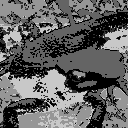

-1

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


# K-means step1
def k_means_step1(img, Class=5):
	#  get shape
	H, W, C = img.shape

	# initiate random seed
	np.random.seed(0)

	# reshape
	img = np.reshape(img, (H * W, -1))

	# select one index randomly
	i = np.random.choice(np.arange(H * W), Class, replace=False)
	Cs = img[i].copy()

	print(Cs)

	clss = np.zeros((H * W), dtype=int)

	# each pixel
	for i in range(H * W):
		# get distance from base pixel
		dis = np.sqrt(np.sum((Cs - img[i]) ** 2, axis=1))
		# get argmin distance
		clss[i] = np.argmin(dis)

	# show
	out = np.reshape(clss, (H, W)) * 50
	out = out.astype(np.uint8)

	return out

# read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# K-means step2
out = k_means_step1(img)

cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)

In [10]:
H, W, C = img.shape
i = np.random.choice(np.arange(H * W),5, replace=False)
img = np.reshape(img, (H * W, -1))
a = img[i]
print(a)

[[ 85.  54.  63.]
 [117.  68.  52.]
 [198. 164. 181.]
 [168. 126. 127.]
 [146. 125. 157.]]


[[182.90548706 156.39289856 181.05880737]
 [157.28413391 124.02828979 136.6774292 ]
 [228.36817932 201.76049805 211.80619812]
 [ 91.52492523  57.49259949  56.78660583]
 [121.73962402  88.02610779  96.16177368]]


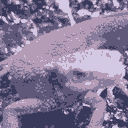

-1

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def k_means(img, Class=5):
    # get shape
    H, W, C = img.shape

    # initiate random seed
    np.random.seed(0)

    # reshape image
    img = np.reshape(img, (H * W, -1))

    # get index randomly
    i = np.random.choice(np.arange(H * W), Class, replace=False)
    Cs = img[i].copy()

    while True:
        # prepare pixel class label
        clss = np.zeros((H * W), dtype=int)
        
        # each pixel
        for i in range(H * W):
            # get distance from index pixel
            dis = np.sqrt(np.sum((Cs - img[i])**2, axis=1))
            # get argmin distance
            clss[i] = np.argmin(dis)

        # selected pixel values
        Cs_tmp = np.zeros((Class, 3))
        
        # each class label
        for i in range(Class):
            Cs_tmp[i] = np.mean(img[clss == i], axis=0)

        # if not any change
        if (Cs == Cs_tmp).all():
            break
        else:
            Cs = Cs_tmp.copy()

    # prepare out image
    out = np.zeros((H * W, 3), dtype=np.float32)

    # assign selected pixel values  
    for i in range(Class):
        out[clss == i] = Cs[i]

    print(Cs)
        
    out = np.clip(out, 0, 255)

    # reshape out image
    out = np.reshape(out, (H, W, 3))
    out = out.astype(np.uint8)

    return out


# read image
img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)

# K-means
out = k_means(img)

cv2.imwrite("out.jpg", out)
cv2_imshow(out)
cv2.waitKey(0)

In [22]:
import numpy as np

# get IoU overlap ratio
def iou(a, b):
	# get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
	# get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])

	# get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
	# get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
	# get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
	# get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

	# get width of IoU
    iou_w = iou_x2 - iou_x1
	# get height of IoU
    iou_h = iou_y2 - iou_y1

	# no overlap
    if iou_w < 0 or iou_h < 0:
	return 0.0

	# get area of IoU
    area_iou = iou_w * iou_h
	# get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)

    return iou

# [x1, y1, x2, y2]
a = np.array((50, 50, 150, 150), dtype=np.float32)

b = np.array((60, 60, 170, 160), dtype=np.float32)

print(iou(a, b))

TabError: ignored

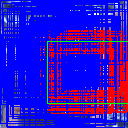

-1

In [23]:
import cv2
import numpy as np

np.random.seed(0)

# get IoU overlap ratio
def iou(a, b):
	# get area of a
    area_a = (a[2] - a[0]) * (a[3] - a[1])
	# get area of b
    area_b = (b[2] - b[0]) * (b[3] - b[1])

	# get left top x of IoU
    iou_x1 = np.maximum(a[0], b[0])
	# get left top y of IoU
    iou_y1 = np.maximum(a[1], b[1])
	# get right bottom of IoU
    iou_x2 = np.minimum(a[2], b[2])
	# get right bottom of IoU
    iou_y2 = np.minimum(a[3], b[3])

	# get width of IoU
    iou_w = iou_x2 - iou_x1
	# get height of IoU
    iou_h = iou_y2 - iou_y1

	# get area of IoU
    area_iou = iou_w * iou_h
	# get overlap ratio between IoU and all area
    iou = area_iou / (area_a + area_b - area_iou)

    return iou

def crop_bbox(img, gt, Crop_N=200, L=60, th=0.5):
    # get shape
    H, W, C = img.shape

    # each crop
    for i in range(Crop_N):
        # get left top x of crop bounding box
        x1 = np.random.randint(W - L)
        # get left top y of crop bounding box
        y1 = np.random.randint(H - L)
        # get right bottom x of crop bounding box
        x2 = x1 + L
        # get right bottom y of crop bounding box
        y2 = y1 + L

        # crop bounding box
        crop = np.array((x1, y1, x2, y2))

        # get IoU between crop box and gt
        _iou = iou(gt, crop)

        # assign label
        if _iou >= th:
            cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 1)
            label = 1
        else:
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 1)
            label = 0

    return img

img = cv2.imread("/content/drive/MyDrive/assets/imori.jpg").astype(np.float32)
# gt bounding box
gt = np.array((47, 41, 129, 103), dtype=np.float32)

# get crop bounding box
img = crop_bbox(img, gt)

# draw gt
cv2.rectangle(img, (gt[0], gt[1]), (gt[2], gt[3]), (0,255,0), 1)

cv2.imwrite("out.jpg", img)
cv2_imshow(img)
cv2.waitKey(0)

In [32]:
#nnのモデル作成　→ 中間層が2層
import numpy as np

np.random.seed(0)

# neural network
class NN:
    def __init__(self, ind=2, w=64, w2=64, outd=1, lr=0.1):
        # layer 1 weight
        self.w1 = np.random.normal(0, 1, [ind, w])
        # layer 1 bias
        self.b1 = np.random.normal(0, 1, [w])
        # layer 2 weight
        self.w2 = np.random.normal(0, 1, [w, w2])
        # layer 2 bias
        self.b2 = np.random.normal(0, 1, [w2])
        # output layer weight
        self.wout = np.random.normal(0, 1, [w2, outd])
        # output layer bias
        self.bout = np.random.normal(0, 1, [outd])
        # learning rate
        self.lr = lr

    def forward(self, x):
        # input tensor
        self.z1 = x
        # layer 1 output tensor
        self.z2 = sigmoid(np.dot(self.z1, self.w1) + self.b1)
        # layer 2 output tensor
        self.z3 = sigmoid(np.dot(self.z2, self.w2) + self.b2)
        # output layer tensor
        self.out = sigmoid(np.dot(self.z3, self.wout) + self.bout)
        return self.out

    def train(self, x, t):
        En = (self.out - t) * self.out * (1 - self.out)
        # get gradients for weight and bias
        grad_wout = np.dot(self.z3.T, En)
        grad_bout = np.dot(np.ones([En.shape[0]]), En)
        # update weight and bias
        self.wout -= self.lr * grad_wout
        self.bout -= self.lr * grad_bout

        grad_u2 = np.dot(En, self.wout.T) * self.z3 * (1 - self.z3)
        grad_w2 = np.dot(self.z2.T, grad_u2)
        grad_b2 = np.dot(np.ones([grad_u2.shape[0]]), grad_u2)
        # update weight and bias
        self.w2 -= self.lr * grad_w2
        self.b2 -= self.lr * grad_b2
        
        # get gradients for weight and bias
        grad_u1 = np.dot(grad_u2, self.w2.T) * self.z2 * (1 - self.z2)
        grad_w1 = np.dot(self.z1.T, grad_u1)
        grad_b1 = np.dot(np.ones([grad_u1.shape[0]]), grad_u1)
        # update weight and bias
        self.w1 -= self.lr * grad_w1
        self.b1 -= self.lr * grad_b1

# sigmoid
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

# train
def train_nn(nn, train_x, train_t, iteration_N=5000):
    for i in range(5000):
        # feed-forward data
        nn.forward(train_x)
        nn.train(train_x, train_t)

    return nn


# test
def test_nn(nn, test_x, test_t):
    for j in range(len(test_x)):
        x = train_x[j]
        t = train_t[j]
        print("in:", x, "pred:", nn.forward(x))


# train data
train_x = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)

# train label data
train_t = np.array([[0], [1], [1], [0]], dtype=np.float32)

# prepare neural network
nn = NN()

# train
nn = train_nn(nn, train_x, train_t, iteration_N=5000)

# test
test_nn(nn, train_x, train_t)

in: [0. 0.] pred: [0.02112243]
in: [0. 1.] pred: [0.97690913]
in: [1. 0.] pred: [0.97987911]
in: [1. 1.] pred: [0.02191621]
